In [ ]:
import pandas as pd


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving School_Attendance_by_Student_Group.csv to School_Attendance_by_Student_Group.csv


In [ ]:
df = pd.read_csv('School_Attendance_by_Student_Group.csv', encoding='latin1')

print(df.head())

  District code District name                    Category  \
0       00000CT   Connecticut                         NaN   
1       00000CT   Connecticut                Homelessness   
2       00000CT   Connecticut  Students With Disabilities   
3       00000CT   Connecticut          Free/Reduced Lunch   
4       00000CT   Connecticut          Free/Reduced Lunch   

                        Student group  2021-2022 student count - year to date  \
0                        All Students                                  500285   
1  Students Experiencing Homelessness                                    1814   
2          Students With Disabilities                                   78417   
3                  Free Meal Eligible                                  168984   
4         Reduced Price Meal Eligible                                   29905   

   2021-2022 attendance rate - year to date  2020-2021 student count  \
0                                    0.9169                 496092.0   
1 

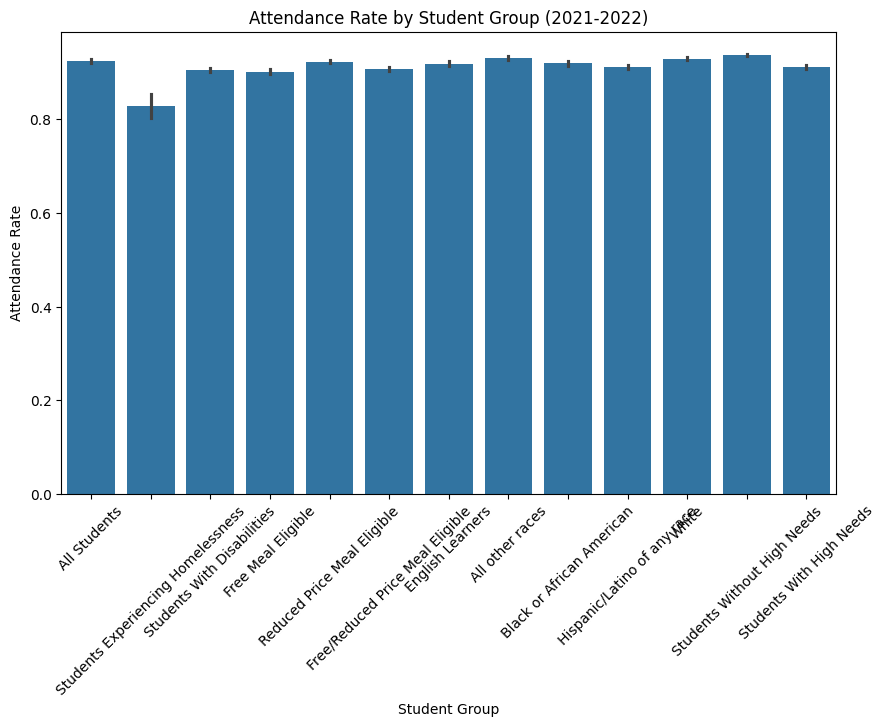

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
sns.barplot(x='Student group', y='2021-2022 attendance rate - year to date', data=df)
plt.xticks(rotation=45)
plt.title('Attendance Rate by Student Group (2021-2022)')
plt.xlabel('Student Group')
plt.ylabel('Attendance Rate')
plt.show()

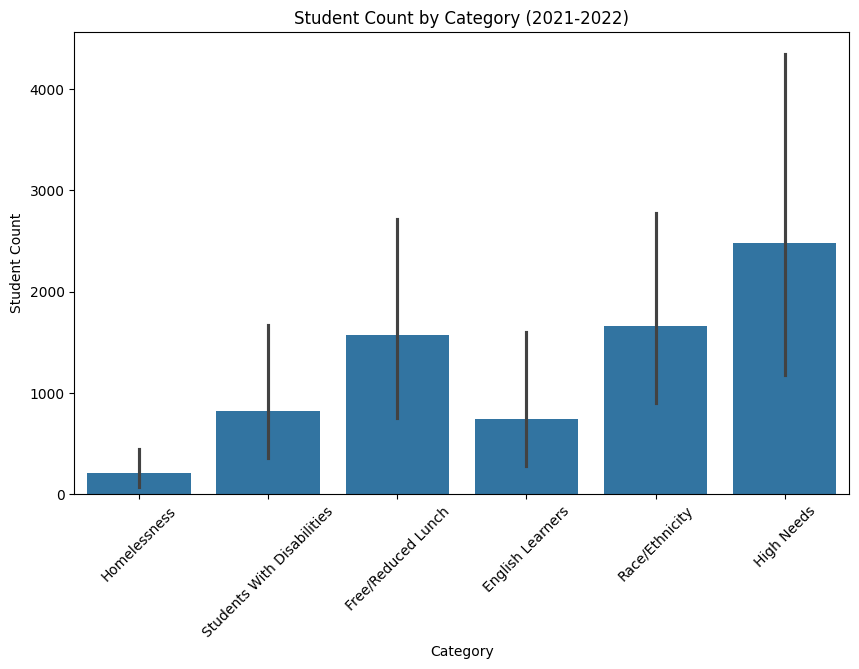

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='2021-2022 student count - year to date', data=df)
plt.xticks(rotation=45)
plt.title('Student Count by Category (2021-2022)')
plt.xlabel('Category')
plt.ylabel('Student Count')
plt.show()


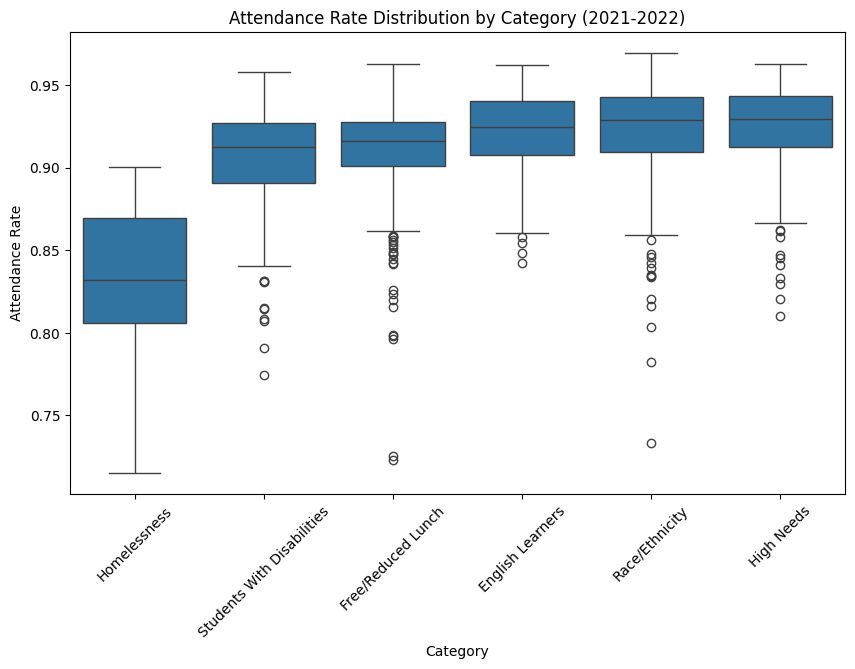

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='2021-2022 attendance rate - year to date', data=df)
plt.xticks(rotation=45)
plt.title('Attendance Rate Distribution by Category (2021-2022)')
plt.xlabel('Category')
plt.ylabel('Attendance Rate')
plt.show()

In [ ]:
df = df[df['Student group'] != 'All Students']
df_dummies = pd.get_dummies(df['Student group'], drop_first=True)
df = df.join(df_dummies)
print(df.head())


  District code District name                    Category  \
1       00000CT   Connecticut                Homelessness   
2       00000CT   Connecticut  Students With Disabilities   
3       00000CT   Connecticut          Free/Reduced Lunch   
4       00000CT   Connecticut          Free/Reduced Lunch   
5       00000CT   Connecticut          Free/Reduced Lunch   

                        Student group  2021-2022 student count - year to date  \
1  Students Experiencing Homelessness                                    1814   
2          Students With Disabilities                                   78417   
3                  Free Meal Eligible                                  168984   
4         Reduced Price Meal Eligible                                   29905   
5    Free/Reduced Price Meal Eligible                                  198889   

   2021-2022 attendance rate - year to date  2020-2021 student count  \
1                                    0.8348                   1735.0   
2 

In [ ]:
import statsmodels.api as sm
import numpy as np
import pandas as pd

df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

Y = df['2021-2022 attendance rate - year to date'].astype(float)


X = df.select_dtypes(include=['number', 'bool'])
X = X.drop(columns=['2021-2022 attendance rate - year to date'])


for col in X.columns[X.dtypes == 'bool']:
    X[col] = X[col].astype(float)


X = sm.add_constant(X)


model = sm.OLS(Y, X).fit()

print(model.summary())


                                       OLS Regression Results                                       
Dep. Variable:     2021-2022 attendance rate - year to date   R-squared:                       0.669
Model:                                                  OLS   Adj. R-squared:                  0.666
Method:                                       Least Squares   F-statistic:                     252.2
Date:                                      Sun, 05 May 2024   Prob (F-statistic):               0.00
Time:                                              17:29:18   Log-Likelihood:                 4730.2
No. Observations:                                      1763   AIC:                            -9430.
Df Residuals:                                          1748   BIC:                            -9348.
Df Model:                                                14                                         
Covariance Type:                                  nonrobust                                